# Beaver River diabase and anorthosite xenolith tilt correction data compilation

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet  # in PATH?
from pyproj import Proj
%matplotlib inline

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

Laurentia_outline = ShapelyFeature(Reader('../data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## BRD unit orientation data compilation

| code | description |
| -----| ----- |
| IL | igneous lam.(plag.algnmt) |
| IM | igneous modal layering   |
| JB | sheet/bedding parallel   |
| SB | bedding            |    
| VB | volcanic flow banding    |
| VC | volcanic flow contact    |
| VF | volcanic flow parting |

### M147 Splitrock map GIS data 

Using the provided supplementary GIS files on M-147 map from Minnesota Geologic Survey, we exported structural orientation measurements. Here we still present the filtered data based on structral units. We will use the sheet/bedding orientations (JB); volcanic flow bedding (VB) (interpreted to be associated with BRD unit; and volcanic flow parting (VF) orientations.

Boerboom, T.J.. (2004). M-147 Bedrock geology of the Split Rock Point quadrangle, Lake County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/57440.

In [3]:
M147_splitrock_data = pd.read_csv('../Data/Orientations/Split_Rock_BRD_orientations.csv')
M147_splitrock_data = M147_splitrock_data[(M147_splitrock_data['STRUCTURE'] == 'JB') | (M147_splitrock_data['STRUCTURE'] == 'VB') | 
                                          (M147_splitrock_data['STRUCTURE'] == 'VF')]

Now lets try to plot all the planes, regardless of the structure names

In [4]:
M147_splitrock_data['strike'] = M147_splitrock_data['DIPD_TREND'] - 90
M147_splitrock_data['pole_trend'] = M147_splitrock_data['DIPD_TREND'] - 180
M147_splitrock_data['pole_plunge'] = 90 - M147_splitrock_data['DIP_PLUNGE']
M147_splitrock_mean_pole = ipmag.fisher_mean(M147_splitrock_data['pole_trend'].tolist(),M147_splitrock_data['pole_plunge'].tolist())
M147_splitrock_mean_strike = M147_splitrock_mean_pole['dec'] + 90
if M147_splitrock_mean_strike > 360:
    M147_splitrock_mean_strike = M147_splitrock_mean_strike - 360
M147_splitrock_mean_dip = 90 - M147_splitrock_mean_pole['inc']
print(M147_splitrock_mean_strike, M147_splitrock_mean_dip)

34.34942188532767 9.261191223262983


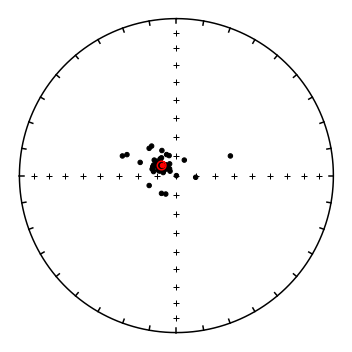

In [5]:
fignum = 4
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M147_splitrock_data['pole_trend'].tolist(),M147_splitrock_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M147_splitrock_mean_pole['dec'],M147_splitrock_mean_pole['inc'],M147_splitrock_mean_pole['alpha95'],color='red')

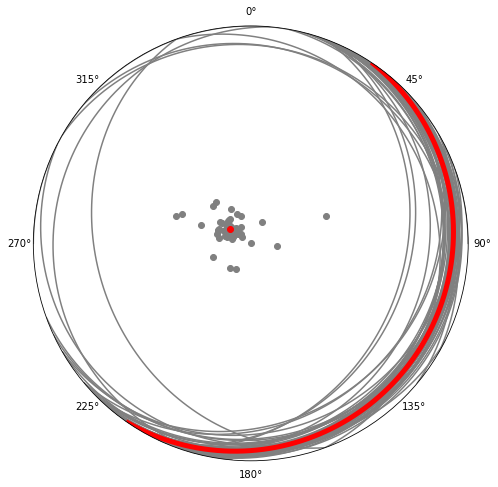

dip trend/dip: 124.3 9.3


In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M147_splitrock_data['strike'], M147_splitrock_data['DIP_PLUNGE'],color='grey')
ax.plane(M147_splitrock_mean_strike, M147_splitrock_mean_dip,color='red',linewidth=5)
ax.pole(M147_splitrock_data['strike'], M147_splitrock_data['DIP_PLUNGE'],color='grey')
ax.pole(M147_splitrock_mean_strike, M147_splitrock_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M147_splitrock_mean_strike+90,1),  round(M147_splitrock_mean_dip, 1))

### M170 Schroeder map GIS data  

There are lots of orientation emasurements on unit NSB, not too many on BRD. We exported BRD orientations. The structural features used are sheet/bedding orientations (JB) and igneous modal layering (IM).

Boerboom, T.J.; Green, J.C.. (2006). M-170 Bedrock geology of the Schroeder quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58167.

In [7]:
M170_Schroeder_data = pd.read_csv('../Data/Orientations/Schroeder_BRD_orientations.csv')
M170_Schroeder_data

,X,Y,ValueId,PolyId,AREA,PERIMETER,STRPT#,STRPT-ID,RELATEID,TYPE,...,DIPD_TREND,DIP_PLUNGE,MRR_RELIAB,N_MEAS,SYM_CODE,DISPLAY,AVANGLE,POLYGONID,SCALE,ANGLE
0,659128.4855,5270816.547,266,28,0,0,28,266,NaN,ST,...,148,18,NaN,0,132,24000,212,0,1,0
1,659130.9083,5270754.766,264,29,0,0,29,264,NaN,ST,...,136,19,NaN,0,73,24000,224,0,1,0
2,658431.9449,5270732.962,263,30,0,0,30,263,NaN,ST,...,133,12,NaN,0,132,24000,227,0,1,0
3,659025.5027,5270692.696,262,31,0,0,31,262,NaN,ST,...,225,14,NaN,0,132,24000,135,0,1,0
4,659089.6575,5270469.413,257,33,0,0,33,257,NaN,ST,...,205,25,NaN,0,132,24000,155,0,1,0
5,659079.5940,5270432.303,256,34,0,0,34,256,NaN,ST,...,188,22,NaN,0,132,24000,172,0,1,0
6,659058.0676,5270317.988,255,35,0,0,35,255,NaN,ST,...,147,25,NaN,1,73,200000,213,0,1,0


In [8]:
M170_Schroeder_data['strike'] = M170_Schroeder_data['DIPD_TREND'] - 90
M170_Schroeder_data['pole_trend'] = M170_Schroeder_data['DIPD_TREND'] - 180
M170_Schroeder_data['pole_plunge'] = 90 - M170_Schroeder_data['DIP_PLUNGE']
M170_Schroeder_mean_pole = ipmag.fisher_mean(M170_Schroeder_data['pole_trend'].tolist(),M170_Schroeder_data['pole_plunge'].tolist())
M170_Schroeder_mean_strike = M170_Schroeder_mean_pole['dec'] + 90
if M170_Schroeder_mean_strike > 360:
    M170_Schroeder_mean_strike = M170_Schroeder_mean_strike - 360
M170_Schroeder_mean_dip = 90 - M170_Schroeder_mean_pole['inc']
print(M170_Schroeder_mean_strike, M170_Schroeder_mean_dip)

79.06891953180553 16.519667729232438


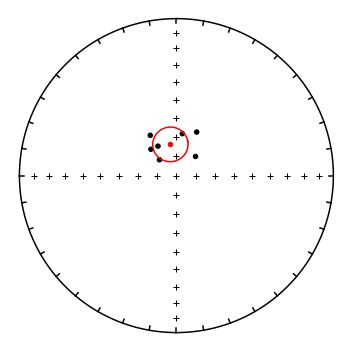

In [9]:
fignum = 5
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M170_Schroeder_data['pole_trend'].tolist(),M170_Schroeder_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M170_Schroeder_mean_pole['dec'],M170_Schroeder_mean_pole['inc'],M170_Schroeder_mean_pole['alpha95'],color='red')

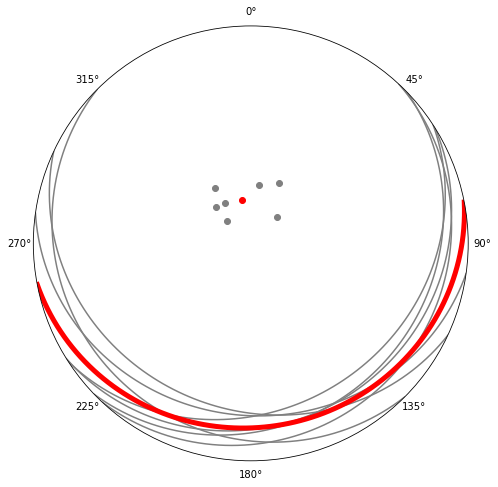

dip trend/dip: 169.1 16.5


In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M170_Schroeder_data['strike'],M170_Schroeder_data['DIP_PLUNGE'],color='grey')
ax.plane(M170_Schroeder_mean_strike,M170_Schroeder_mean_dip,color='red',linewidth=5)
ax.pole(M170_Schroeder_data['strike'],M170_Schroeder_data['DIP_PLUNGE'],color='grey')
ax.pole(M170_Schroeder_mean_strike,M170_Schroeder_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M170_Schroeder_mean_strike+90,1),  round(M170_Schroeder_mean_dip, 1))

### M171 Tofte map GIS data 

There are lots of orientation emasurements on unit NSB, not too many on BRD. We exported BRD orientations. The structural features used are sheet/bedding orientations (JB), igneous modal layering (IM) and igneous lamination (IL).

Boerboom, T.J.; Green, J.C.; Albers, P.; Miller, James D., Jr.. (2006). M-171 Bedrock geology of the Tofte quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58168.

In [11]:
M171_Tofte_data = pd.read_csv('../Data/Orientations/Tofte_BRD_orientations.csv')
M171_Tofte_data

,X,Y,ValueId,PolyId,AREA,PERIMETER,STRPT#,STRPT-ID,RELATEID,TYPE,...,DIPD_TREND,DIP_PLUNGE,MRR_RELIAB,N_MEAS,SYM_CODE,DISPLAY,AVANGLE,POLYGONID,SCALE,ANGLE
0,-90.848728,47.624339,407,5,0,0,5,407,NaN,ST,...,110,20,NaN,0,73,0,250,0,1,0
1,-90.849933,47.623333,402,8,0,0,8,402,NaN,ST,...,120,18,NaN,0,73,0,240,0,1,0
2,-90.816998,47.616733,386,23,0,0,23,386,NaN,ST,...,160,17,NaN,1,73,12000,200,0,1,0
3,-90.850494,47.615946,381,28,0,0,28,381,NaN,ST,...,129,19,2.0,0,73,-1,231,0,1,0
4,-90.843811,47.615800,380,29,0,0,29,380,NaN,ST,...,80,10,NaN,0,73,0,280,0,1,0
5,-90.857010,47.612701,366,42,0,0,42,366,NaN,ST,...,115,15,2.0,0,132,0,245,0,1,0
6,-90.852026,47.611706,362,46,0,0,46,362,NaN,ST,...,110,11,2.0,0,132,0,250,0,1,0
7,-90.852288,47.611483,359,49,0,0,49,359,NaN,ST,...,127,12,2.0,0,73,0,233,0,1,0
8,-90.854219,47.610257,354,54,0,0,54,354,NaN,ST,...,95,8,2.0,0,132,0,265,0,1,0
9,-90.860766,47.602483,340,66,0,0,66,340,NaN,ST,...,112,9,NaN,0,73,0,248,0,1,0


In [12]:
M171_Tofte_data['strike'] = M171_Tofte_data['DIPD_TREND'] - 90
M171_Tofte_data['pole_trend'] = M171_Tofte_data['DIPD_TREND'] - 180
M171_Tofte_data['pole_plunge'] = 90 - M171_Tofte_data['DIP_PLUNGE']
M171_Tofte_mean_pole = ipmag.fisher_mean(M171_Tofte_data['pole_trend'].tolist(),M171_Tofte_data['pole_plunge'].tolist())
M171_Tofte_mean_strike = M171_Tofte_mean_pole['dec'] + 90
if M171_Tofte_mean_strike > 360:
    M171_Tofte_mean_strike = M171_Tofte_mean_strike - 360
M171_Tofte_mean_dip = 90 - M171_Tofte_mean_pole['inc']
print(M171_Tofte_mean_strike, M171_Tofte_mean_dip)

24.801929419687212 13.064197398593379


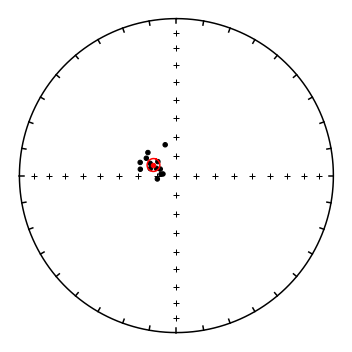

In [13]:
fignum = 6
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M171_Tofte_data['pole_trend'].tolist(),M171_Tofte_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M171_Tofte_mean_pole['dec'],M171_Tofte_mean_pole['inc'],M171_Tofte_mean_pole['alpha95'],color='red')

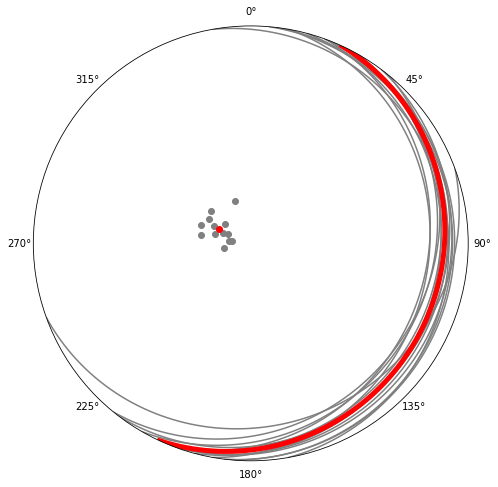

dip trend/dip: 114.8 13.1


In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M171_Tofte_data['strike'],M171_Tofte_data['DIP_PLUNGE'],color='grey')
ax.plane(M171_Tofte_mean_strike,M171_Tofte_mean_dip,color='red',linewidth=5)
ax.pole(M171_Tofte_data['strike'],M171_Tofte_data['DIP_PLUNGE'],color='grey')
ax.pole(M171_Tofte_mean_strike,M171_Tofte_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M171_Tofte_mean_strike+90,1),  round(M171_Tofte_mean_dip, 1))

### Plotting all orientation mesurements for BRD unit

In [15]:
All_BRD_poletrend = list()
All_BRD_poleplunge = list()

All_BRD_poletrend.extend(M147_splitrock_data['pole_trend'].tolist())
All_BRD_poleplunge.extend(M147_splitrock_data['pole_plunge'].tolist())

All_BRD_poletrend.extend(M170_Schroeder_data['pole_trend'].tolist())
All_BRD_poleplunge.extend(M170_Schroeder_data['pole_plunge'].tolist())

All_BRD_poletrend.extend(M171_Tofte_data['pole_trend'].tolist())
All_BRD_poleplunge.extend(M171_Tofte_data['pole_plunge'].tolist())
# All_BRD_poletrend

In [16]:
BRD_mean_pole = ipmag.fisher_mean(All_BRD_poletrend, All_BRD_poleplunge)
BRD_mean_pole

{'dec': 308.46095011287906,
 'inc': 79.790435305574,
 'n': 71,
 'r': 70.00326136894387,
 'k': 70.22904281920812,
 'alpha95': 2.0218887642335748,
 'csd': 9.665551612637595}

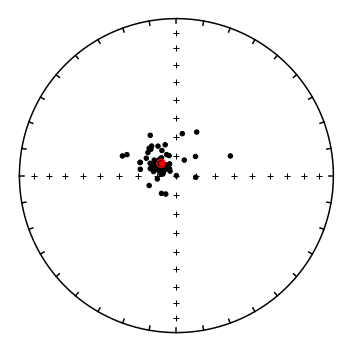

In [17]:
fignum = 7
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(All_BRD_poletrend,All_BRD_poleplunge)
ipmag.plot_di_mean(BRD_mean_pole['dec'],BRD_mean_pole['inc'],BRD_mean_pole['alpha95'],color='red')

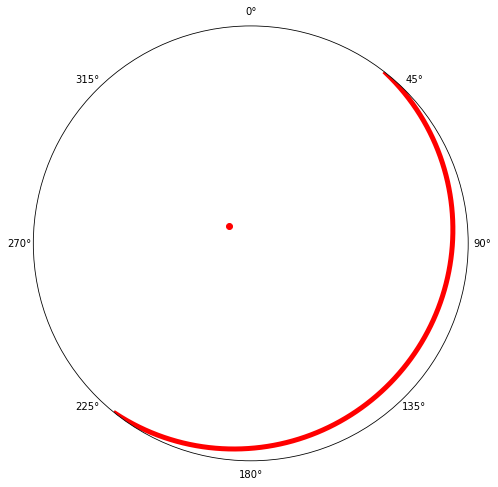

dip trend/dip: 128.5 10.2


In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(BRD_mean_pole['dec'] + 90, 90 - BRD_mean_pole['inc'],color='red',linewidth=5)
ax.pole(BRD_mean_pole['dec'] + 90, 90 - BRD_mean_pole['inc'],color='red')

plt.show()
print('dip trend/dip:', round(BRD_mean_pole['dec'] -180,1),  round(90 - BRD_mean_pole['inc'], 1))

## NSB (Shroeder-Lutsen sequence) Lava flow orientation data compilation

### M065 Silver Bay & M066 Illgen City map

These two maps have no published GIS data available online. On the published map, there are not any bedding measurement, but only "Attitude of inclined modal or textural layering in intrusive rocks", which are often not in expected direction. Therefore, our sample sites in this region have to adopt a general bedding correction. 

Miller, James D., Jr.. (1988). M-065 Geologic map of the Silver Bay and Split Rock Point NE quadrangles, Lake County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/60004.

Miller, James D., Jr.; Green, J.C.; Boerboom, T.J.. (1989). M-066 Geologic map of the Illgen City quadrangle, Lake County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/60005.

### M170 Schroeder map GIS data

We will use the sheet/bedding orientations (JB); volcanic flow bedding (VB) (interpreted to be associated with BRD unit; and volcanic flow contact (VC) orientations.

Boerboom, T.J.; Green, J.C.. (2006). M-170 Bedrock geology of the Schroeder quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58167.

The orientation data imported below are from the Schroeder-Lutsen Basalts (given the code 'NSB' on the map).

In [10]:
M170_Schroeder_NSB_data = pd.read_csv('../Data/Orientations/Schroeder_NSB_orientations.csv')
# M170_Schroeder_NSB_data = M170_Schroeder_NSB_data[M170_Schroeder_NSB_data['STRUCTURE'] == 'VC']
# M170_Schroeder_NSB_data  

In [11]:
M170_Schroeder_NSB_data['strike'] = M170_Schroeder_NSB_data['DIPD_TREND'] - 90
M170_Schroeder_NSB_data['pole_trend'] = M170_Schroeder_NSB_data['DIPD_TREND'] - 180
M170_Schroeder_NSB_data['pole_plunge'] = 90 - M170_Schroeder_NSB_data['DIP_PLUNGE']
M170_NSB_mean_pole = ipmag.fisher_mean(M170_Schroeder_NSB_data['pole_trend'].tolist(),M170_Schroeder_NSB_data['pole_plunge'].tolist())
M170_NSB_mean_strike = M170_NSB_mean_pole['dec'] + 90
if M170_NSB_mean_strike > 360:
    M170_NSB_mean_strike = M170_NSB_mean_strike - 360
M170_NSB_mean_dip = 90 - M170_NSB_mean_pole['inc']
print(M170_NSB_mean_strike, M170_NSB_mean_dip)

51.563917993245354 15.984429780113743


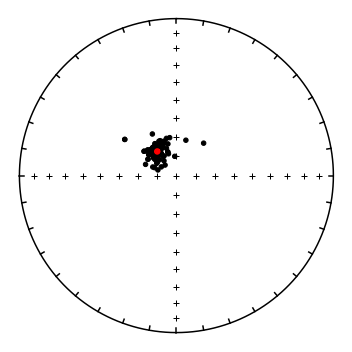

In [12]:
fignum = 8
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M170_Schroeder_NSB_data['pole_trend'].tolist(),M170_Schroeder_NSB_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M170_NSB_mean_pole['dec'],M170_NSB_mean_pole['inc'],M170_NSB_mean_pole['alpha95'],color='red')

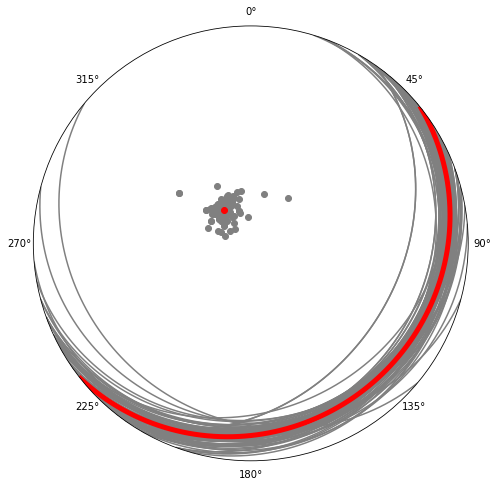

dip trend/dip: 141.6 16.0


In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M170_Schroeder_NSB_data['strike'],M170_Schroeder_NSB_data['DIP_PLUNGE'],color='grey')
ax.plane(M170_NSB_mean_strike,M170_NSB_mean_dip,color='red',linewidth=5)
ax.pole(M170_Schroeder_NSB_data['strike'],M170_Schroeder_NSB_data['DIP_PLUNGE'],color='grey')
ax.pole(M170_NSB_mean_strike,M170_NSB_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M170_NSB_mean_strike+90,1),  round(M170_NSB_mean_dip, 1))

### M171 Tofte map GIS data 

There are lots of orientation measurements on unit NSB (Schroeder-Lutsen basalts), not too many on BRD. We will use volcanic flow bedding (VB) (interpreted to be associated with BRD unit; volcanic flow contact (VC) orientations, and volcanic flow parting (VF) orientations. 

Boerboom, T.J.; Green, J.C.; Albers, P.; Miller, James D., Jr.. (2006). M-171 Bedrock geology of the Tofte quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58168.

In [23]:
M171_Tofte_NSB_data = pd.read_csv('../Data/Orientations/Tofte_NSB_orientations.csv')
# M171_Tofte_NSB_data

In [24]:
M171_Tofte_NSB_data['strike'] = M171_Tofte_NSB_data['DIPD_TREND'] - 90
M171_Tofte_NSB_data['pole_trend'] = M171_Tofte_NSB_data['DIPD_TREND'] - 180
M171_Tofte_NSB_data['pole_plunge'] = 90 - M171_Tofte_NSB_data['DIP_PLUNGE']
M171_NSB_mean_pole = ipmag.fisher_mean(M171_Tofte_NSB_data['pole_trend'].tolist(),M171_Tofte_NSB_data['pole_plunge'].tolist())
M171_NSB_mean_strike = M171_NSB_mean_pole['dec'] + 90
if M171_NSB_mean_strike > 360:
    M171_NSB_mean_strike = M171_NSB_mean_strike - 360
M171_NSB_mean_dip = 90 - M171_NSB_mean_pole['inc']
print(M171_NSB_mean_strike, M171_NSB_mean_dip)

57.25030531174326 11.556302675252212


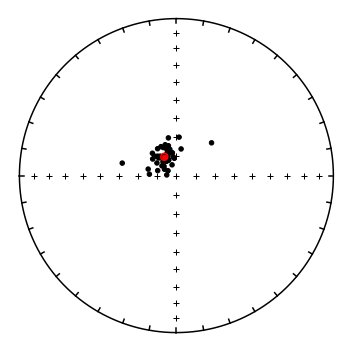

In [25]:
fignum = 9
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M171_Tofte_NSB_data['pole_trend'].tolist(),M171_Tofte_NSB_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M171_NSB_mean_pole['dec'],M171_NSB_mean_pole['inc'],M171_NSB_mean_pole['alpha95'],color='red')

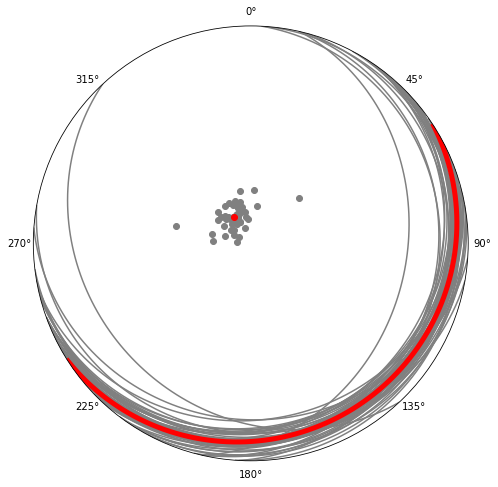

dip trend/dip: 147.3 11.6


In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M171_Tofte_NSB_data['strike'],M171_Tofte_NSB_data['DIP_PLUNGE'],color='grey')
ax.plane(M171_NSB_mean_strike,M171_NSB_mean_dip,color='red',linewidth=5)
ax.pole(M171_Tofte_NSB_data['strike'],M171_Tofte_NSB_data['DIP_PLUNGE'],color='grey')
ax.pole(M171_NSB_mean_strike,M171_NSB_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M171_NSB_mean_strike+90,1),  round(M171_NSB_mean_dip, 1))

### M172 Little Marais map GIS data

This map has a lot of orientation measurements, but only on unit NSB, which is Schroeder basalts (which overlie the Beaver Bay Complex). We might consider plotting the orientation measurements from this unit to compare with the BRD data. We will use igneous lamination (IL); volcanic flow bedding (VB) (interpreted to be associated with BRD unit; volcanic flow contact (VC) orientations, and volcanic flow parting (VF) orientations.

Miller, James D., Jr.; Green, J.C.; Jerde, E.A.. (2006). M-172 Bedrock geology of the Little Marais quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58169.

In [27]:
M172_LittleMarais_data = pd.read_csv('../Data/Orientations/Little_Marais_NSB_orientations.csv')
M172_LittleMarais_data = M172_LittleMarais_data[M172_LittleMarais_data['DIP_PLUNGE'] < 50]

In [28]:
M172_LittleMarais_data['strike'] = M172_LittleMarais_data['DIPD_TREND'] - 90
M172_LittleMarais_data['pole_trend'] = M172_LittleMarais_data['DIPD_TREND'] - 180
M172_LittleMarais_data['pole_plunge'] = 90 - M172_LittleMarais_data['DIP_PLUNGE']
M172_LittleMarais_mean_pole = ipmag.fisher_mean(M172_LittleMarais_data['pole_trend'].tolist(),M172_LittleMarais_data['pole_plunge'].tolist())
M172_LittleMarais_mean_strike = M172_LittleMarais_mean_pole['dec'] + 90
if M172_LittleMarais_mean_strike > 360:
    M172_LittleMarais_mean_strike = M172_LittleMarais_mean_strike - 360
M172_LittleMarais_mean_dip = 90 - M172_LittleMarais_mean_pole['inc']
print(M172_LittleMarais_mean_strike, M172_LittleMarais_mean_dip)

41.14595437070329 16.507880957153873


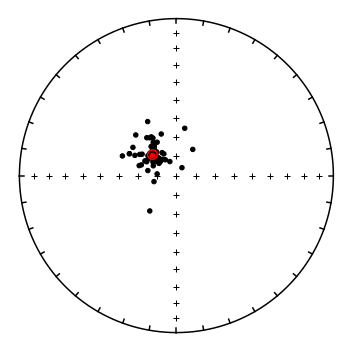

In [29]:
fignum = 10
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M172_LittleMarais_data['pole_trend'].tolist(),M172_LittleMarais_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M172_LittleMarais_mean_pole['dec'],M172_LittleMarais_mean_pole['inc'],M172_LittleMarais_mean_pole['alpha95'],color='red')

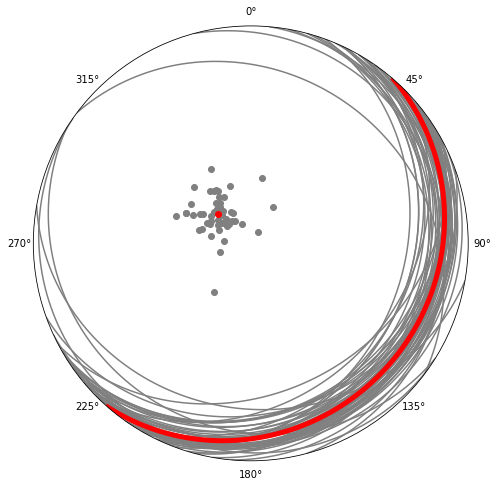

dip trend/dip: 131.1 16.5


In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M172_LittleMarais_data['strike'],M172_LittleMarais_data['DIP_PLUNGE'],color='grey')
ax.plane(M172_LittleMarais_mean_strike,M172_LittleMarais_mean_dip,color='red',linewidth=5)
ax.pole(M172_LittleMarais_data['strike'],M172_LittleMarais_data['DIP_PLUNGE'],color='grey')
ax.pole(M172_LittleMarais_mean_strike,M172_LittleMarais_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M172_LittleMarais_mean_strike+90,1),  round(M172_LittleMarais_mean_dip, 1))

### M174 Lutsen map GIS data

This study has bedding plane orientations from unit NSB, a younger volcanic unit than BRD. We will use structural bedding orientations (SB); volcanic flow bedding (VB) (interpreted to be associated with BRD unit; volcanic flow contact (VC) orientations, and volcanic flow parting (VF) orientations.

Boerboom, T.J.; Green, J.C.; Albers, P.. (2007). M-174 Bedrock geology of the Lutsen quadrangle, Cook County, Minnesota. Minnesota Geological Survey. Retrieved from the University of Minnesota Digital Conservancy, http://hdl.handle.net/11299/58171.

In [31]:
M174_Lutsen_data = pd.read_csv('../Data/Orientations/Lutsen_NSB_orientations.csv')  
# M174_Lutsen_data

In [32]:
M174_Lutsen_data['strike'] = M174_Lutsen_data['DIPD_TREND'] - 90
M174_Lutsen_data['pole_trend'] = M174_Lutsen_data['DIPD_TREND'] - 180
M174_Lutsen_data['pole_plunge'] = 90 - M174_Lutsen_data['DIP_PLUNGE']
M174_NSB_mean_pole = ipmag.fisher_mean(M174_Lutsen_data['pole_trend'].tolist(),M174_Lutsen_data['pole_plunge'].tolist())
M174_NSB_mean_strike = M174_NSB_mean_pole['dec'] + 90
if M174_NSB_mean_strike > 360:
    M174_NSB_mean_strike = M174_NSB_mean_strike - 360
M174_NSB_mean_dip = 90 - M174_NSB_mean_pole['inc']
print(M174_NSB_mean_strike, M174_NSB_mean_dip)

55.2074544598953 12.941711863332358


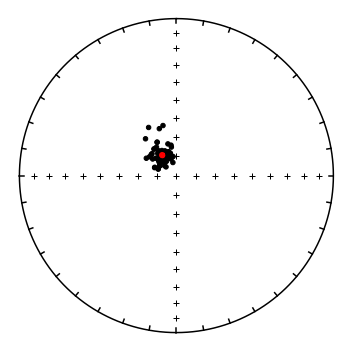

In [33]:
fignum = 11
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(M174_Lutsen_data['pole_trend'].tolist(),M174_Lutsen_data['pole_plunge'].tolist())
ipmag.plot_di_mean(M174_NSB_mean_pole['dec'],M174_NSB_mean_pole['inc'],M174_NSB_mean_pole['alpha95'],color='red')

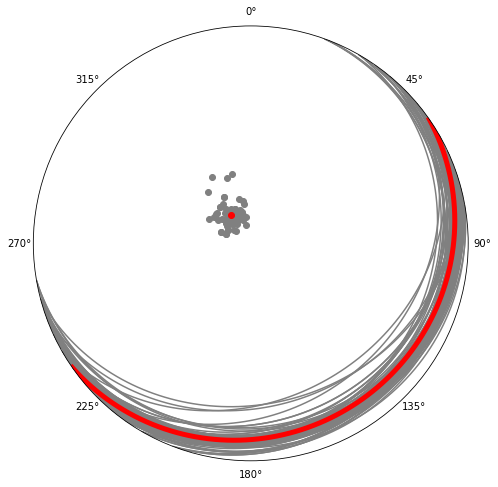

dip trend/dip: 145.2 12.9


In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(M174_Lutsen_data['strike'],M174_Lutsen_data['DIP_PLUNGE'],color='grey')
ax.plane(M174_NSB_mean_strike,M174_NSB_mean_dip,color='red',linewidth=5)
ax.pole(M174_Lutsen_data['strike'],M174_Lutsen_data['DIP_PLUNGE'],color='grey')
ax.pole(M174_NSB_mean_strike,M174_NSB_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(M174_NSB_mean_strike+90,1),  round(M174_NSB_mean_dip, 1))

### Plotting all orientation measurements for NSB unit

In [35]:
All_NSB_poletrend = list()
All_NSB_poleplunge = list()

All_NSB_poletrend.extend(M170_Schroeder_NSB_data['pole_trend'].tolist())
All_NSB_poleplunge.extend(M170_Schroeder_NSB_data['pole_plunge'].tolist())

All_NSB_poletrend.extend(M171_Tofte_NSB_data['pole_trend'].tolist())
All_NSB_poleplunge.extend(M171_Tofte_NSB_data['pole_plunge'].tolist())

All_NSB_poletrend.extend(M171_Tofte_data['pole_trend'].tolist())
All_NSB_poleplunge.extend(M171_Tofte_data['pole_plunge'].tolist())

All_NSB_poletrend.extend(M172_LittleMarais_data['pole_trend'].tolist())
All_NSB_poleplunge.extend(M172_LittleMarais_data['pole_plunge'].tolist())

All_NSB_poletrend.extend(M174_Lutsen_data['pole_trend'].tolist())
All_NSB_poleplunge.extend(M174_Lutsen_data['pole_plunge'].tolist())

# All_NSB_poletrend

In [36]:
NSB_mean_pole = ipmag.fisher_mean(All_NSB_poletrend, All_NSB_poleplunge)
NSB_mean_pole

{'dec': 319.82545526256604,
 'inc': 75.82943814671683,
 'n': 263,
 'r': 260.6499665336067,
 'k': 111.48777400268324,
 'alpha95': 0.8250742752924628,
 'csd': 7.671342919401258}

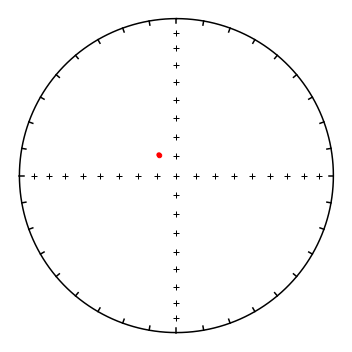

In [37]:
fignum = 13
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(NSB_mean_pole['dec'],NSB_mean_pole['inc'],NSB_mean_pole['alpha95'],color='red')

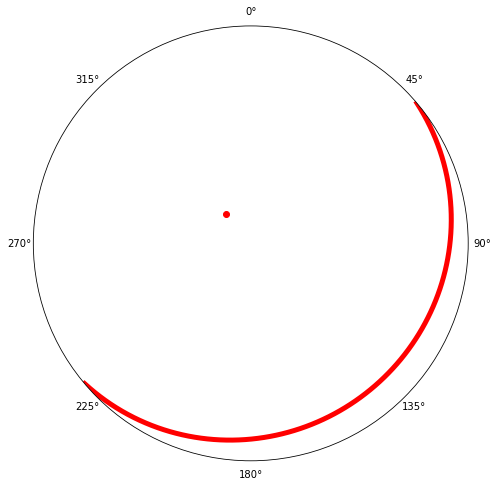

dip trend/dip: 139.8 14.2


In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(NSB_mean_pole['dec'] + 90, 90 - NSB_mean_pole['inc'],color='red',linewidth=5)
ax.pole(NSB_mean_pole['dec'] + 90, 90 - NSB_mean_pole['inc'],color='red')

plt.show()
print('dip trend/dip:', round(NSB_mean_pole['dec']-180,1),  round(90-NSB_mean_pole['inc'], 1))

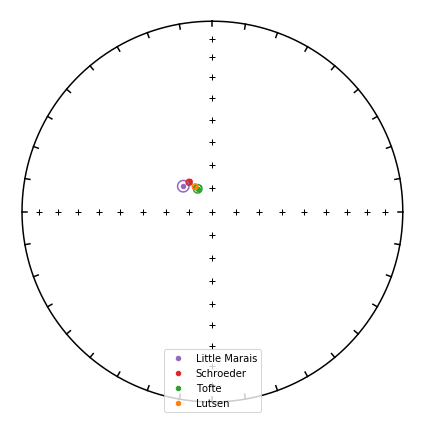

In [39]:
fignum = 13
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(M172_LittleMarais_mean_pole['dec'],M172_LittleMarais_mean_pole['inc'],M172_LittleMarais_mean_pole['alpha95'],color='C4',label='Little Marais')
ipmag.plot_di_mean(M170_NSB_mean_pole['dec'],M170_NSB_mean_pole['inc'],M170_NSB_mean_pole['alpha95'],color='C3',label='Schroeder')
ipmag.plot_di_mean(M171_NSB_mean_pole['dec'],M171_NSB_mean_pole['inc'],M171_NSB_mean_pole['alpha95'],color='C2',label='Tofte')
ipmag.plot_di_mean(M174_NSB_mean_pole['dec'],M174_NSB_mean_pole['inc'],M174_NSB_mean_pole['alpha95'],color='C1',label='Lutsen')
plt.legend(loc=8)
plt.show()

## S21 Minnesota geologic map orientation data for the Schroeder-Lutsen basalt

In [40]:
SL_basalt_orientations = pd.read_csv('../Data/Orientations/schroeder_lutsen_basalt_orientations.csv')
SL_basalt_orientations = SL_basalt_orientations[SL_basalt_orientations['STRUC_TYPE'] == 'P']
SL_basalt_orientations = SL_basalt_orientations[(SL_basalt_orientations['STRUCTURE'] != 'FZ') & (SL_basalt_orientations['STRUCTURE'] != 'IM')]
SL_basalt_orientations = SL_basalt_orientations[SL_basalt_orientations['DIP_PLUNGE'] < 30]
SL_basalt_orientations.head()

,Y,X,AREA,PERIMETER,GEMSTR_,GEMSTR_ID,RELATEID,TYPE,GCM_CODE,GEOC_SRC,...,REFRNCE,STRUCTURE,STRUC_TYPE,DIPD_TREND,DIP_PLUNGE,MRR_RELIAB,N_MEAS,SYM_CODE,DISPLAY,AVANGLE
1,47.413878,-91.100421,0.0,0.0,0,0,NaN,NaN,NaN,NaN,...,MGS Misc. Map M-71,VC,P,115,13,NaN,1,124,12000,245
3,47.439161,-91.066034,0.0,0.0,0,0,NaN,NaN,NaN,NaN,...,MGS Misc. Map M-71,VC,P,153,5,NaN,1,124,12000,207
4,47.444961,-91.058450,0.0,0.0,0,0,NaN,NaN,NaN,NaN,...,MGS Misc. Map M-71,VC,P,136,18,NaN,1,124,12000,224
6,47.457508,-91.035096,0.0,0.0,0,0,NaN,NaN,NaN,NaN,...,MGS Misc. Map M-71,VC,P,135,24,NaN,1,124,12000,225
7,47.458355,-91.032745,0.0,0.0,0,0,NaN,NaN,NaN,NaN,...,MGS Misc. Map M-71,VC,P,95,10,NaN,1,124,200000,265


In [41]:
SL_basalt_orientations['strike'] = SL_basalt_orientations['DIPD_TREND'] - 90
SL_basalt_orientations['pole_trend'] = SL_basalt_orientations['DIPD_TREND'] - 180
SL_basalt_orientations['pole_plunge'] = 90 - SL_basalt_orientations['DIP_PLUNGE']
SL_basalt_mean_pole = ipmag.fisher_mean(SL_basalt_orientations['pole_trend'].tolist(),SL_basalt_orientations['pole_plunge'].tolist())
SL_basalt_mean_strike = SL_basalt_mean_pole['dec'] + 90
if SL_basalt_mean_strike > 360:
    SL_basalt_mean_strike = SL_basalt_mean_strike - 360
SL_basalt_mean_dip = 90 - SL_basalt_mean_pole['inc']
print(SL_basalt_mean_strike, SL_basalt_mean_dip)

46.72735065574142 15.031717988988234


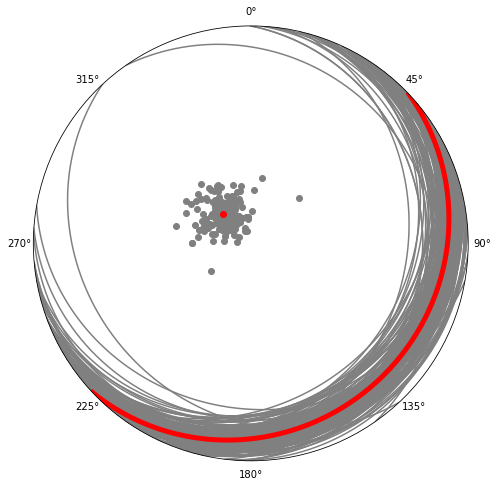

dip trend/dip: 136.7 15.0


In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(SL_basalt_orientations['strike'],SL_basalt_orientations['DIP_PLUNGE'],color='grey')
ax.plane(SL_basalt_mean_strike,SL_basalt_mean_dip,color='red',linewidth=5)
ax.pole(SL_basalt_orientations['strike'],SL_basalt_orientations['DIP_PLUNGE'],color='grey')
ax.pole(SL_basalt_mean_strike,SL_basalt_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(SL_basalt_mean_strike+90,1),  round(SL_basalt_mean_dip, 1))

## GB Gooseberry Basalt flow bedding orientation from summer 2014 fieldwork 

In [43]:
GB_fieldwork_data = pd.read_csv('../Data/Orientations/Gooseberry/ALL_plane.csv')
# GB_fieldowrk_data 

In [44]:
GB_fieldwork_data['pole_trend'] = GB_fieldwork_data['dip_dir'] - 180
GB_fieldwork_data['pole_plunge'] = 90 - GB_fieldwork_data['dip']
GB_mean_plane_pole = ipmag.fisher_mean(GB_fieldwork_data['pole_trend'].tolist(),GB_fieldwork_data['pole_plunge'].tolist())
GB_mean_strike = GB_mean_plane_pole['dec']+90
if GB_mean_strike > 360:
    GB_mean_strike = GB_mean_strike - 360
GB_mean_dip = 90 - GB_mean_plane_pole['inc']
print(GB_mean_strike, GB_mean_dip, GB_mean_plane_pole['alpha95'])

24.605663742527497 10.171934930519981 0.6861355934169822


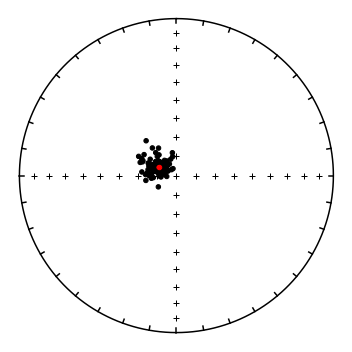

In [45]:
fignum = 14
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(GB_fieldwork_data['pole_trend'].tolist(),GB_fieldwork_data['pole_plunge'].tolist())
ipmag.plot_di_mean(GB_mean_plane_pole['dec'],GB_mean_plane_pole['inc'],GB_mean_plane_pole['alpha95'],color='red')

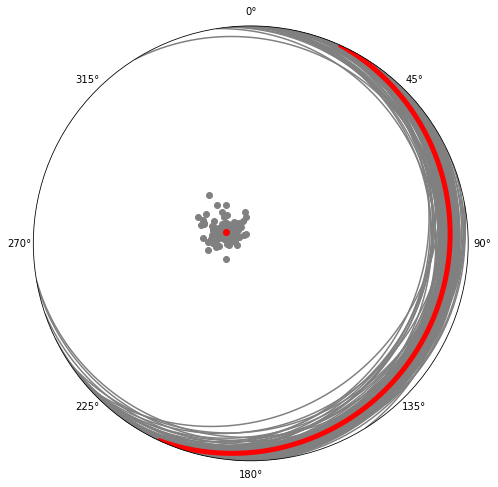

dip trend/dip: 114.6 10.2


In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(GB_fieldwork_data['strike'],GB_fieldwork_data['dip'],color='grey')
ax.plane(GB_mean_strike,GB_mean_dip,color='red',linewidth=5)
ax.pole(GB_fieldwork_data['strike'],GB_fieldwork_data['dip'],color='grey')
ax.pole(GB_mean_strike,GB_mean_dip,color='red')

plt.show()
print('dip trend/dip:', round(GB_mean_strike+90,1),  round(GB_mean_dip, 1))

## Testing the common mean of orientation measurements based on different maps/untis

- BRD: dip trend/dip: 128.5 10.2
- NSB: dip trend/dip: 139.8 14.2
- SLB: dip trend/dip: 136.7 15.0
- GB: dip trend/dip: 114.6 10.2

In [47]:
# Taking the mean of everything
All_pole_trend = list()
All_pole_plunge = list()

All_pole_trend.extend(All_BRD_poletrend)
All_pole_trend.extend(All_NSB_poletrend)
All_pole_trend.extend(GB_fieldwork_data['pole_trend'].tolist())

All_pole_plunge.extend(All_BRD_poleplunge)
All_pole_plunge.extend(All_NSB_poleplunge)
All_pole_plunge.extend(GB_fieldwork_data['pole_plunge'].tolist())

All_mean = ipmag.fisher_mean(All_pole_trend, All_pole_plunge)

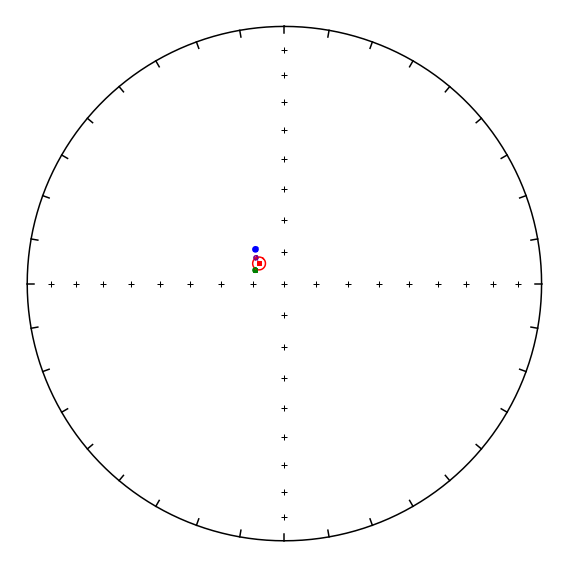

In [48]:
fignum = 15
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
# ipmag.plot_di(All_BRD_poletrend,All_BRD_poleplunge, color = 'red')
# ipmag.plot_di(All_NSB_poletrend,All_NSB_poleplunge, color = 'blue')
# ipmag.plot_di(GB_fieldowrk_data['pole_trend'].tolist(),GB_fieldowrk_data['pole_plunge'].tolist(), color = 'green')

ipmag.plot_di_mean(BRD_mean_pole['dec'],BRD_mean_pole['inc'], BRD_mean_pole['alpha95'],color='red', marker = 's')
ipmag.plot_di_mean(NSB_mean_pole['dec'],NSB_mean_pole['inc'],NSB_mean_pole['alpha95'],color='blue', marker = 's')
ipmag.plot_di_mean(GB_mean_plane_pole['dec'],GB_mean_plane_pole['inc'],GB_mean_plane_pole['alpha95'],color='green', marker = 's')
ipmag.plot_di_mean(All_mean['dec'], All_mean['inc'], All_mean['alpha95'], color = 'purple', marker = '*')

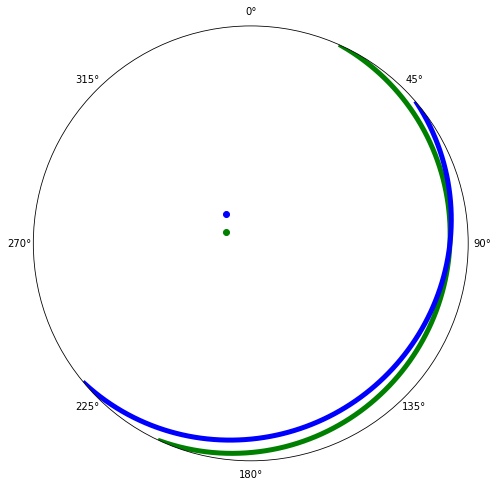

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(GB_mean_strike,GB_mean_dip,color='green',linewidth=5)
ax.plane(NSB_mean_pole['dec'] + 90, 90 - NSB_mean_pole['inc'],color='blue',linewidth=5)
ax.pole(GB_mean_strike,GB_mean_dip,color='green')
ax.pole(NSB_mean_pole['dec'] + 90, 90 - NSB_mean_pole['inc'],color='blue')
plt.show()

In [50]:
BRD_di_blocks = ipmag.make_di_block(All_BRD_poletrend, All_BRD_poleplunge)
NSB_di_blocks = ipmag.make_di_block(All_NSB_poletrend, All_NSB_poleplunge)
GB_di_blocks = ipmag.make_di_block(GB_fieldwork_data['pole_trend'].tolist(),GB_fieldwork_data['pole_plunge'].tolist())

### Comparing BRD and NSB tilt correction


In [51]:
ipmag.common_mean_watson(BRD_di_blocks, NSB_di_blocks)

Results of Watson V test: 

Watson's V:           27.2
Critical value of V:  6.3
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 4.6
Critical angle for M&M1990:   2.2



(0, 4.613088332338145, 2.213539449395329)

### Comparing BRD and GB

Failed!

In [52]:
ipmag.common_mean_watson(BRD_di_blocks, GB_di_blocks)

Results of Watson V test: 

Watson's V:           8.0
Critical value of V:  6.1
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 2.4
Critical angle for M&M1990:   2.1



(0, 2.4458607474009, 2.135218463993333)

### Comparing NSB and GB


In [53]:
ipmag.common_mean_watson(NSB_di_blocks, GB_di_blocks)

Results of Watson V test: 

Watson's V:           225.8
Critical value of V:  6.0
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 6.6
Critical angle for M&M1990:   1.1



(0, 6.56406484236531, 1.0677146458900584)

It looks like these data sets have too small alpha95. and NSB in particular deviates from the other two datasets a bit more. Therefore, they dont agree. 

## Regrouping bedding orientations by location for tilt correcting BRD and AX

### East BBC orientation group

The published maps near Carlton Peak East BBC site are M170 Schroeder's BRD unit and NSB unit, M171 Tofte NSB unit, M174 Lutsen NSB unit. We group both BRD unit and NSB measurement together since they have similar tilt. 

In [54]:
East_BBC_pole_trend = list()
East_BBC_pole_plunge = list()

East_BBC_pole_trend.extend(M170_Schroeder_data['pole_trend'].tolist())
East_BBC_pole_plunge.extend(M170_Schroeder_data['pole_plunge'].tolist())

East_BBC_pole_trend.extend(M171_Tofte_data['pole_trend'].tolist())
East_BBC_pole_plunge.extend(M171_Tofte_data['pole_plunge'].tolist())

East_BBC_pole_trend.extend(M170_Schroeder_NSB_data['pole_trend'].tolist())
East_BBC_pole_plunge.extend(M170_Schroeder_NSB_data['pole_plunge'].tolist())

East_BBC_pole_trend.extend(M171_Tofte_NSB_data['pole_trend'].tolist())
East_BBC_pole_plunge.extend(M171_Tofte_NSB_data['pole_plunge'].tolist())

East_BBC_pole_trend.extend(M174_Lutsen_data['pole_trend'].tolist())
East_BBC_pole_plunge.extend(M174_Lutsen_data['pole_plunge'].tolist())

East_BBC_pole_mean = ipmag.fisher_mean(East_BBC_pole_trend, East_BBC_pole_plunge)

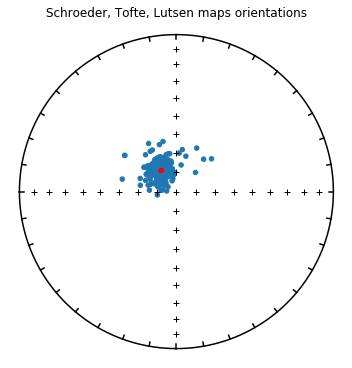

In [55]:
fignum = 16
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(East_BBC_pole_trend,East_BBC_pole_plunge,color='C0',label='BRD bedding poles')
ipmag.plot_di_mean(East_BBC_pole_mean['dec'],East_BBC_pole_mean['inc'],East_BBC_pole_mean['alpha95'],color='red')
plt.title('Schroeder, Tofte, Lutsen maps orientations')
plt.show()

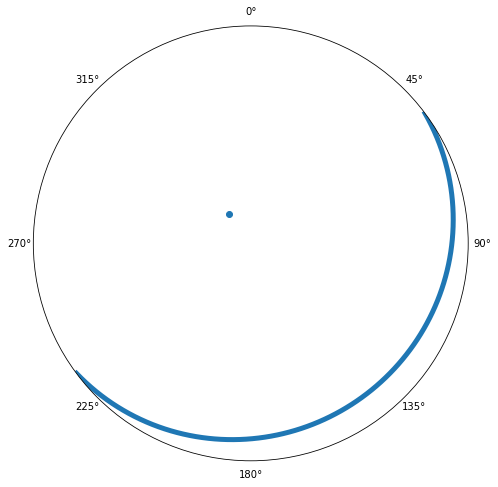

dip trend/dip: 143.3 13.7


In [58]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='C0',linewidth=5)
ax.pole(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='C0')

plt.show()
print('dip trend/dip:', round(East_BBC_pole_mean['dec'] + 90 - 270,1), round(90 - East_BBC_pole_mean['inc'], 1))
      

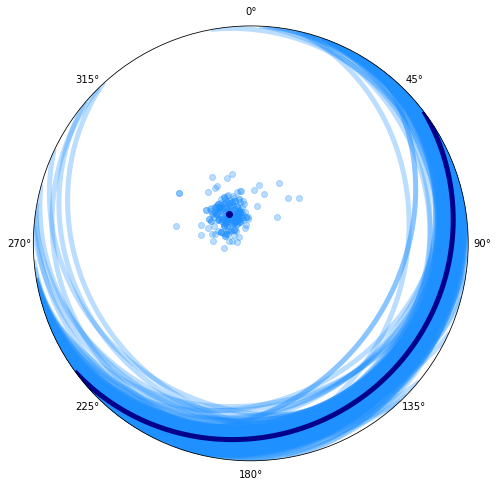

dip trend/dip: 143.3 13.7


In [59]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(np.array(East_BBC_pole_trend) + 90, 90 - np.array(East_BBC_pole_plunge),color='dodgerblue',linewidth=5, alpha = 0.3)
ax.pole(np.array(East_BBC_pole_trend) + 90, 90 - np.array(East_BBC_pole_plunge),color='dodgerblue', alpha = 0.3)

ax.plane(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='darkblue',linewidth=5)
ax.pole(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='darkblue')

# plt.savefig('../Figure/East_BBC_structural_correction.pdf')
# Carlton_Peak_title = 'Eastern BBC'+'\n'+'dip trend/dip: '+str(round(Carlton_mean_pole['dec'] + 90, 1))+'/'+str(round(90 - Carlton_mean_pole['inc'], 1))
# plt.title(Carlton_Peak_title)
plt.show()
print('dip trend/dip:', round(East_BBC_pole_mean['dec'] + 90 -270,1), round(90 - East_BBC_pole_mean['inc'], 1))

### South BBC orientation group

Published map orientations in Beaver Bay and Silver Bay area are Split rock and Little Maraise. Their orientations are close to the measurement taken in Gooseberry basalt during fieldwork in 2014 led by Nick S-H. We will combine them all for an average tilt correction for southern BBC.

In [60]:
South_BBC_pole_trend = list()
South_BBC_pole_plunge = list()

South_BBC_pole_trend.extend(M147_splitrock_data['pole_trend'].tolist())
South_BBC_pole_plunge.extend(M147_splitrock_data['pole_plunge'].tolist())

South_BBC_pole_trend.extend(M172_LittleMarais_data['pole_trend'].tolist())
South_BBC_pole_plunge.extend(M172_LittleMarais_data['pole_plunge'].tolist())

South_BBC_pole_trend.extend(GB_fieldwork_data['pole_trend'].tolist())
South_BBC_pole_plunge.extend(GB_fieldwork_data['pole_plunge'].tolist())

South_BBC_mean_pole = ipmag.fisher_mean(South_BBC_pole_trend, South_BBC_pole_plunge)
South_BBC_mean_pole

{'dec': 301.15332708053677,
 'inc': 78.812800948075,
 'n': 248,
 'r': 245.79172991400378,
 'k': 111.8522600864607,
 'alpha95': 0.8484089570062624,
 'csd': 7.658833653505578}

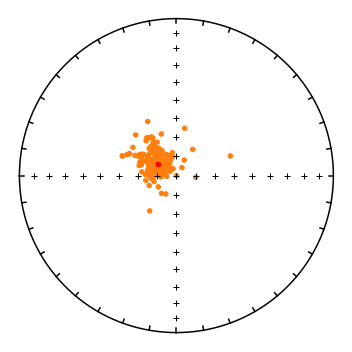

In [61]:
fignum = 17
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(South_BBC_pole_trend, South_BBC_pole_plunge,color='C1')
ipmag.plot_di_mean(South_BBC_mean_pole['dec'],South_BBC_mean_pole['inc'],South_BBC_mean_pole['alpha95'],color='red')

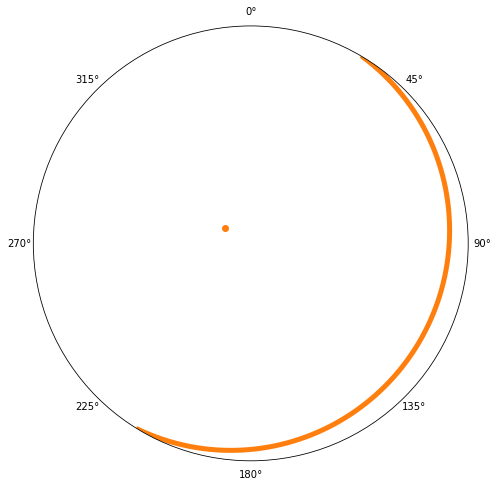

dip trend/dip: 121.15332708053677 11.187199051925006


In [62]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='C1',linewidth=5)
ax.pole(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='C1')

plt.show()
print('dip trend/dip:', South_BBC_mean_pole['dec'] + 90-270, 90 - South_BBC_mean_pole['inc'])

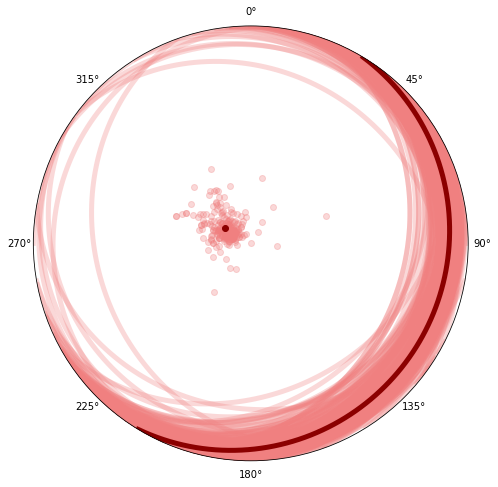

dip trend/dip: 121.2 11.2


In [63]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(np.array(South_BBC_pole_trend) + 90, 90 - np.array(South_BBC_pole_plunge), color='lightcoral',linewidth=5, alpha = 0.3)
ax.pole(np.array(South_BBC_pole_trend) + 90, 90 - np.array(South_BBC_pole_plunge), color='lightcoral', alpha = 0.3)

ax.plane(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='darkred',linewidth=5)
ax.pole(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='darkred')

# plt.savefig('../Figure/South_BBC_structural_correction.pdf')
# plt.title('Beaver Bay area structural correction')
plt.show()
print('dip trend/dip:', round(South_BBC_mean_pole['dec'] + 90 -270,1), round(90 - South_BBC_mean_pole['inc'], 1))

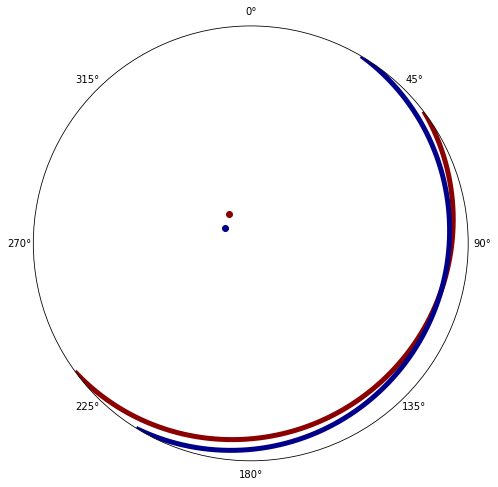

143.2872987148753 13.706548127788679
121.15332708053677 11.187199051925006


In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='darkred',linewidth=5)
ax.pole(East_BBC_pole_mean['dec'] + 90, 90 - East_BBC_pole_mean['inc'],color='darkred')
ax.plane(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='darkblue',linewidth=5)
ax.pole(South_BBC_mean_pole['dec'] + 90, 90 - South_BBC_mean_pole['inc'],color='darkblue')
plt.show()

print(East_BBC_pole_mean['dec'] + 90 - 270, 90 - East_BBC_pole_mean['inc'])
print(South_BBC_mean_pole['dec'] + 90 - 270, 90 - South_BBC_mean_pole['inc'])

- We will use East BBC tilt correction for site AX3, AX4, AX5, AX6, AX7, AX8, AX9, AX10, and BD2, BD14, BD15, BD16. 
- We will use South BBC tilt correction for site AX1, AX2, AX11, AX12, AX13, AX14, AX15, AX16, AX17, AX18, AX19, AX20, AX21, AX22, BD1, BD3, BD4, BD5, BD6, BD7. BD8. BD9, BD10, BD11, BD12, BD13, BD17. 

- East BBC mean diptrend/dip = 143.3/13.7
- South BBC mean diptrend/dip = 121.2/11.2